Title: "Exploratory Data Analysis "

# Introduction

The Home Mortgage Disclosure Act (HMDA), enacted by the United States Congress in 1975, mandates that a wide array of financial institutions collect, report, and publicly disclose granular data regarding their mortgage lending activities (Consumer Financial Protection Bureau, n.d.). This comprehensive dataset serves multiple critical functions.

Firstly, HMDA data provides valuable insights into whether lenders are adequately meeting the housing credit needs of their local communities (Charles & Hurst, 2002). By analyzing lending patterns across different geographic areas and demographic groups, researchers and policymakers can identify potential disparities in access to mortgage credit (Fishbein, 1981).

Secondly, HMDA data equips public officials with essential information to inform their decision-making processes and shape housing policies (Federal Financial Institutions Examination Council, n.d.). For instance, by examining the distribution of loan approvals and denials, policymakers can assess the effectiveness of fair lending laws and regulations (Charles & Hurst, 2002).

Lastly, HMDA data plays a pivotal role in identifying discriminatory lending practices (Canner et al., 1995). By scrutinizing loan terms and conditions across different borrower characteristics, researchers can detect potential instances of redlining or other forms of unlawful discrimination (Ladd, 1982).

However, it is important to note that the publicly available HMDA data is carefully modified to safeguard the privacy of applicants and borrowers (Consumer Financial Protection Bureau, 2018). This ensures that individuals' personal and financial information remains confidential while still allowing for meaningful analysis of aggregate lending patterns (Federal Financial Institutions Examination Council, 2023).

## Understanding terminologies

**lien status** refers to the legal claim a lender has on a borrower's property. This claim serves as collateral for the loan and gives the lender the right to seize and sell the property if the borrower fails to repay the loan as agreed.
**Loan originated** referes to when a loan is closed. The last stage of the loan is **Loan Origination**. 

# Understanding some data perspectives

**Location** encompasses the geographical identifiers of the subject property, including the state, metropolitan statistical area (MSA), and census tract designation.       

**Property Type** in the context of mortgage lending data encompasses two distinct aspects: the physical structure of the property and its intended occupancy. This categorical variable typically includes three main values for property type:

**One-to-four family dwelling:** This category refers to residential properties designed to accommodate one to four families, such as single-family homes, duplexes, triplexes, and quadruplexes.
**Manufactured housing:** This category encompasses prefabricated homes, including mobile homes and modular homes, which are constructed in a factory and then transported to their final location.
**Multifamily dwelling:** This category includes residential properties designed for multiple families, such as apartment buildings and condominiums with five or more units.

**Applicant** The HMDA data includes demographic information for both applicants and co-applicants on mortgage loan applications. This encompasses the gender and racial/ethnic background of each individual. Specifically, the data identifies the sex of the applicant and co-applicant, as well as the racial and ethnic identity of each. This information is collected to monitor fair lending practices and identify potential disparities in access to mortgage credit.

### Some data perspectives for above.
<pre>
applicant_ethnicity		
1	applicant_ethnicity_1	Hispanic or Latino
2	applicant_ethnicity_2	Not Hispanic or Latino 
3	applicant_ethnicity_3	Information not provided by applicant in mail, Internet, or telephone application
4	applicant_ethnicity_4	Not applicable
        
applicant _race_1		
1	applicant _race_1_1	American Indian or Alaska Native
2	applicant _race_1_2	Asian
3	applicant _race_1_3	Black or African American
4	applicant _race_1_4	Native Hawaiian or Other Pacific Islander
5	applicant _race_1_5	White
6	applicant _race_1_6	Information not provided by applicant in mail, Internet, or telephone application
7	applicant _race_1_7	Not applicable
        
co_applicant_ethnicity		
1	co_applicant_ethnicity_1	Hispanic or Latino
2	co_applicant_ethnicity_2	Not Hispanic or Latino
3	co_applicant_ethnicity_3	Information not provided by applicant in mail, Internet, or telephone application
4	co_applicant_ethnicity_4	Not applicable
5	co_applicant_ethnicity_5	No co-applicant
        
co_applicant_race_1		
1	co_applicant_race_1_1	American Indian or Alaska Native
2	co_applicant_race_1_2	Asian
3	co_applicant_race_1_3	Black or African American
4	co_applicant_race_1_4	Native Hawaiian or Other Pacific Islander
5	co_applicant_race_1_5	White
6	co_applicant_race_1_6	Information not provided by applicant in mail, Internet, or telephone application
7	co_applicant_race_1_7	Not applicable
8	co_applicant_race_1_8	No co-applicant
        
lien_status		
1	lien_status_1	Secured by a first lien
2	lien_status_2	Secured by a subordinate lien
3	lien_status_3	Not secured by a lien
4	lien_status_4	Not applicable
        
action_taken		
1	action_taken_1	Loan originated
2	action_taken_2	Application approved but not accepted
3	action_taken_3	Application denied by financial institution
4	action_taken_4	Application withdrawn by applicant
5	action_taken_5	File closed for incompleteness
6	action_taken_6	Loan purchased by the institution
7	action_taken_7	Preapproval request denied by financial institution
        
property_type		
1	property_type_1	One-to-four family dwelling (other than manufactured housing)
2	property_type_2	Manufactured housing
3	property_type_3	Multifamily dwelling

</pre>

# Load the data and define the colors

In [53]:
import pandas as pd

file_path = "/Users/gini/Documents/dissertation_analysis/input/ny_hmda_2015.csv"
mortgage_data = pd.read_csv(file_path, low_memory=False)


# Define colors
fillColor = "#8bb4f7"
fillColor2 = "#8bf747"

# concise summary of the dataset, info about index dtype, column dtypes, non-null values and memory usage
mortgage_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439654 entries, 0 to 439653
Data columns (total 78 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   action_taken                    439654 non-null  int64  
 1   action_taken_name               439654 non-null  object 
 2   agency_code                     439654 non-null  int64  
 3   agency_abbr                     439654 non-null  object 
 4   agency_name                     439654 non-null  object 
 5   applicant_ethnicity             439654 non-null  int64  
 6   applicant_ethnicity_name        439654 non-null  object 
 7   applicant_income_000s           378651 non-null  float64
 8   applicant_race_1                439654 non-null  int64  
 9   applicant_race_2                1610 non-null    float64
 10  applicant_race_3                87 non-null      float64
 11  applicant_race_4                15 non-null      float64
 12  applicant_race_5

In [54]:
mortgage_data.describe().round(2).T.sort_values("mean",ascending=False)

,count,mean,std,min,25%,50%,75%,max
sequence_number,439654.0,104681.41,213794.80,1.00,1266.00,12981.50,92453.75,1207358.00
hud_median_family_income,437987.0,78224.31,16235.41,57200.00,69000.00,71300.00,82700.00,109000.00
msamd,403279.0,32291.99,9621.92,10580.00,35004.00,35614.00,35614.00,48060.00
population,437958.0,4749.29,1881.88,1.00,3439.00,4554.00,5892.00,26588.00
as_of_year,439654.0,2015.00,0.00,2015.00,2015.00,2015.00,2015.00,2015.00
number_of_1_to_4_family_units,437418.0,1511.69,790.50,6.00,965.00,1520.00,2009.00,6345.00
census_tract_number,437987.0,1387.38,2427.44,1.00,127.00,305.01,1350.02,9840.00
number_of_owner_occupied_units,437605.0,1214.08,609.38,2.00,748.00,1196.00,1640.00,6454.00
loan_amount_000s,439654.0,333.32,1173.20,1.00,102.00,208.00,366.00,99999.00
applicant_income_000s,378651.0,140.15,268.47,1.00,58.00,90.00,142.00,9999.00


# Actions on Loans distribution

In this section, we analyze the distribution of various loan actions within the dataset. As previously established, our primary interest lies in the "Loan Origination" action, as it indicates that the loan application has been approved and the funds are being disbursed to the applicant. A comprehensive understanding of the prevalence of this action is crucial for assessing the overall lending activity and its impact on borrowers and communities.

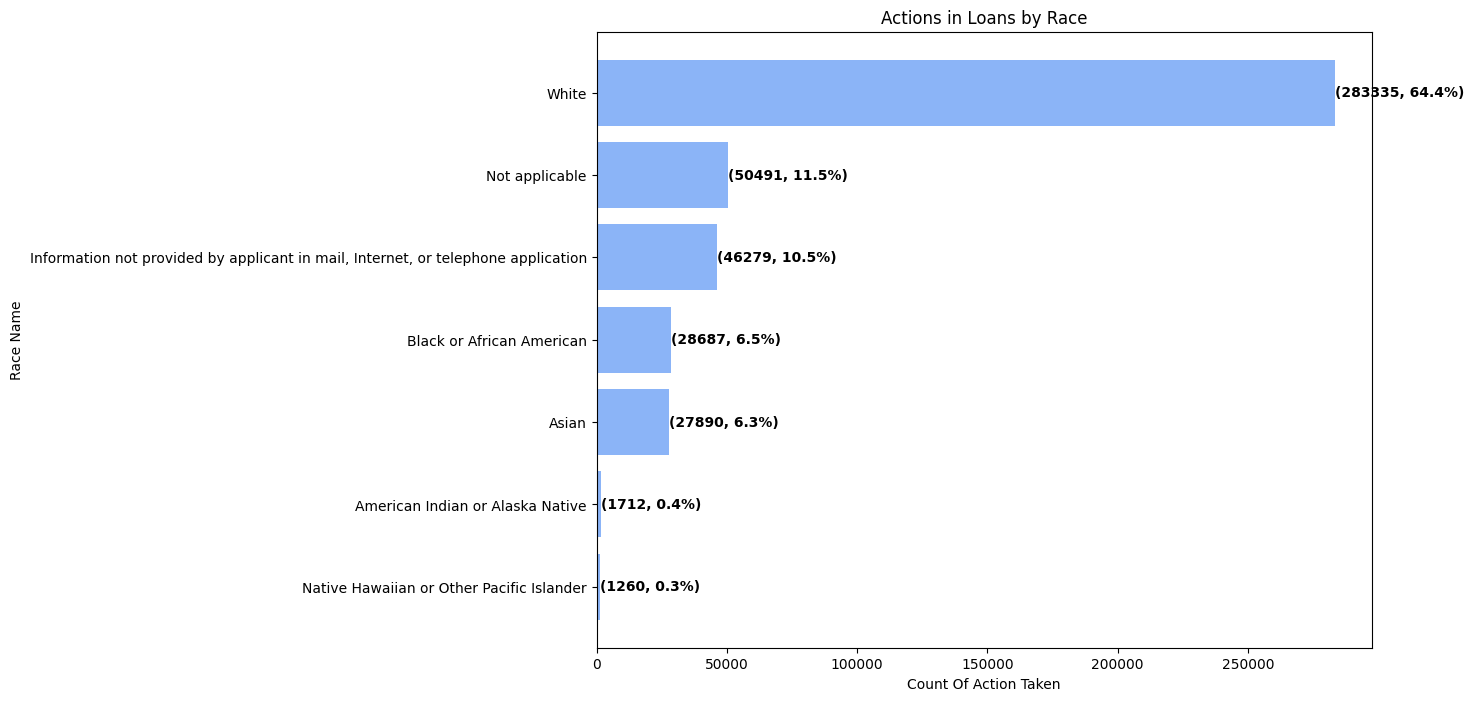

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data (using the common function)
homeMortgage = mortgage_data

# 1. Analyze action taken by applicant's primary race
homeMortgageStatus_applicant_race1 = (homeMortgage.groupby(['action_taken_name', 'applicant_race_name_1'])
                                                  .size()
                                                  .reset_index(name='CountOfActionTaken')
                                                  .sort_values(by='CountOfActionTaken', ascending=False))

# 2. Analyze overall distribution of applicant's primary races
homeMortgage_applicant_race1 = (homeMortgage.groupby('applicant_race_name_1')
                                .size()
                                .reset_index(name='CountOfRace1')
                                .sort_values(by='CountOfRace1', ascending=False))

# 3. Plot the distribution of applicant's primary races with percentages
plt.figure(figsize=(10, 8))

total_applicants = homeMortgage_applicant_race1['CountOfRace1'].sum()

plt.barh(homeMortgage_applicant_race1['applicant_race_name_1'],
         homeMortgage_applicant_race1['CountOfRace1'], color=fillColor)

# Add text labels to the bars (now with percentages)
for i, v in enumerate(homeMortgage_applicant_race1['CountOfRace1']):
    percentage = (v / total_applicants) * 100  # Calculate percentage
    # Format label with count and percentage
    label = f"({v}, {percentage:.1f}%)"
    plt.text(v + 1, i, label, color='black', va='center', fontweight='bold')

# Add plot labels and title
plt.xlabel('Count Of Action Taken')
plt.ylabel('Race Name')
plt.title('Actions in Loans by Race')
plt.gca().invert_yaxis()  # Flip the y-axis to match the R plot

plt.show()

# Dependencies of Ethnicity on the Actions

Evaluation of various ethnic groups that have been found associated with loan origination.

## Distribution of Ethnic Groups

The graph below shows the distribution of various ethnic groups.

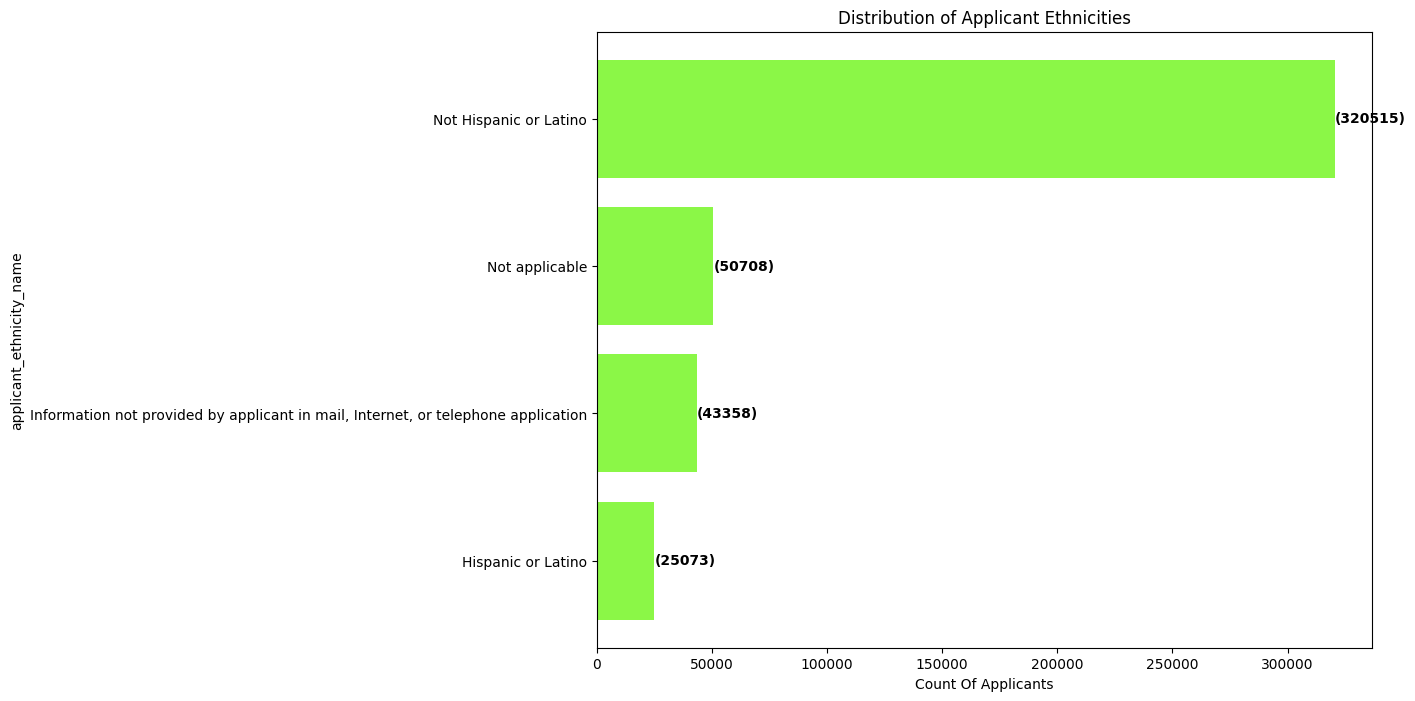

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (make sure this path matches your file location)
homeMortgage = mortgage_data  # Load data using the function

# 1. Analyze action taken by ethnicity
homeMortgageStatus_ethnicity = (homeMortgage.groupby(['action_taken_name', 'applicant_ethnicity_name'])
                                            .size()
                                            .reset_index(name='CountOfActionTaken')
                                            .sort_values(by='CountOfActionTaken', ascending=False))

# 2. Analyze overall distribution of ethnicities
homeMortgage_ethnicity = (homeMortgage.groupby('applicant_ethnicity_name')
                          .size()
                          .reset_index(name='CountOfEthnicity')
                          .sort_values(by='CountOfEthnicity', ascending=False))

# 3. Plot the distribution of ethnicities
plt.figure(figsize=(10, 8))  # Optional: Adjust plot size

plt.barh(homeMortgage_ethnicity['applicant_ethnicity_name'],
         homeMortgage_ethnicity['CountOfEthnicity'], color=fillColor2)

# Add text labels to the bars
for i, v in enumerate(homeMortgage_ethnicity['CountOfEthnicity']):
    plt.text(v + 1, i, f"({v})", color='black', va='center', fontweight='bold')

plt.xlabel('Count Of Applicants')
plt.ylabel('applicant_ethnicity_name')
plt.title('Distribution of Applicant Ethnicities')
plt.gca().invert_yaxis()
plt.show()

## Loan Status vs Ethnicity

This distribution shows the impact on loan status per ethnicity.

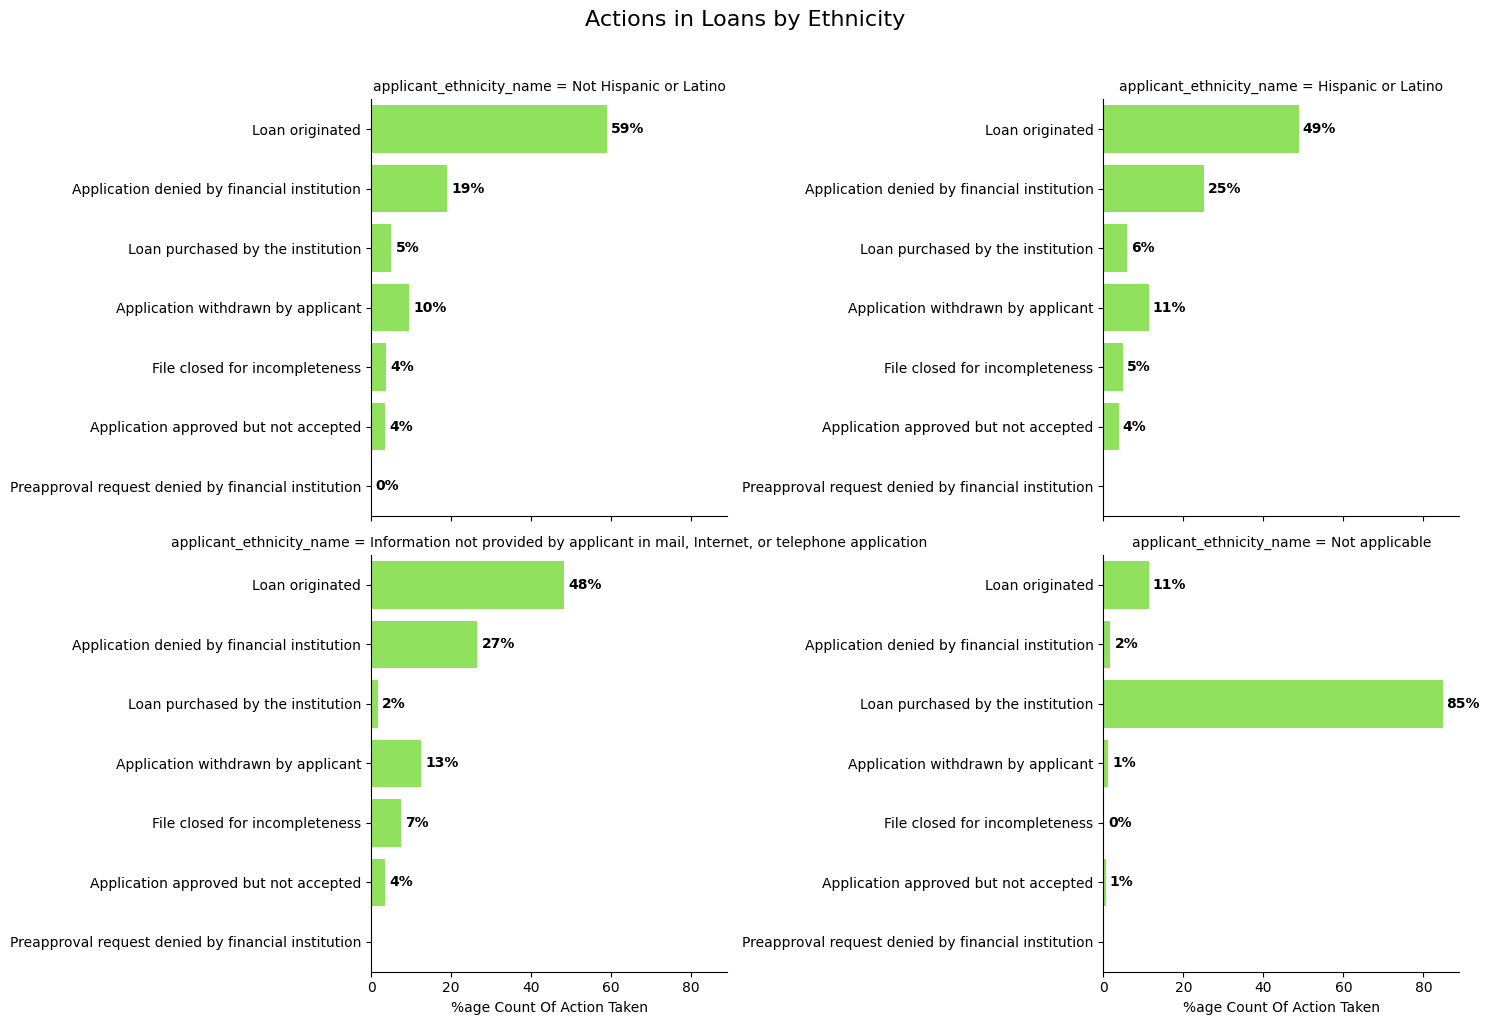

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
import seaborn as sns

# Load data (using the common function)
homeMortgage = mortgage_data


# 1. Analyze action taken by ethnicity
homeMortgageStatus_ethnicity = (homeMortgage.groupby(['action_taken_name', 'applicant_ethnicity_name'])
                                            .size()
                                            .reset_index(name='CountOfActionTaken')
                                            .sort_values(by='CountOfActionTaken', ascending=False))

# 2. Analyze overall distribution of ethnicities
homeMortgage_ethnicity = (homeMortgage.groupby('applicant_ethnicity_name')
                          .size()
                          .reset_index(name='CountOfEthnicity')
                          .sort_values(by='CountOfEthnicity', ascending=False))

# 3. Join and calculate percentages
homeMortgageStatus_ethnicity2 = (pd.merge(homeMortgageStatus_ethnicity, homeMortgage_ethnicity, on='applicant_ethnicity_name')
                                 .assign(percentage=lambda df: (df['CountOfActionTaken'] / df['CountOfEthnicity']) * 100))


# 4. Plotting with FacetGrid and wrapped labels (removed)

# Sort the data by the average percentage of the top action to determine the column order
top_action = homeMortgageStatus_ethnicity2['action_taken_name'].value_counts(
).index[0]
facet_order = homeMortgageStatus_ethnicity2[homeMortgageStatus_ethnicity2['action_taken_name'] == top_action].sort_values(
    'percentage', ascending=False)['applicant_ethnicity_name'].tolist()

# Set col_wrap to 2 to have two columns (i.e., graphs) per row
g = sns.FacetGrid(homeMortgageStatus_ethnicity2, col='applicant_ethnicity_name', col_wrap=2, sharey=False,
                  height=5, aspect=1.5, col_order=facet_order)  # Adjusted aspect for better fit with two columns

# Create the bar plots on each facet
g.map(sns.barplot, 'percentage', 'action_taken_name',
      order=homeMortgageStatus_ethnicity2['action_taken_name'].unique(), color=fillColor2)

# Add percentage labels to the bars
for ax in g.axes.flat:
    for p in ax.patches:
        width = p.get_width()
        if width > 0:  # Only label bars with a positive value
            ax.text(width + 1, p.get_y() + p.get_height() / 2, f"{width:.0f}%",
                    color='black', ha='left', va='center', fontweight='bold')

# Add titles and labels
g.fig.suptitle('Actions in Loans by Ethnicity', y=1.02, fontsize=16)
g.set_axis_labels('%age Count Of Action Taken', '')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

# The Loan Origination Process impacting Race

## Races

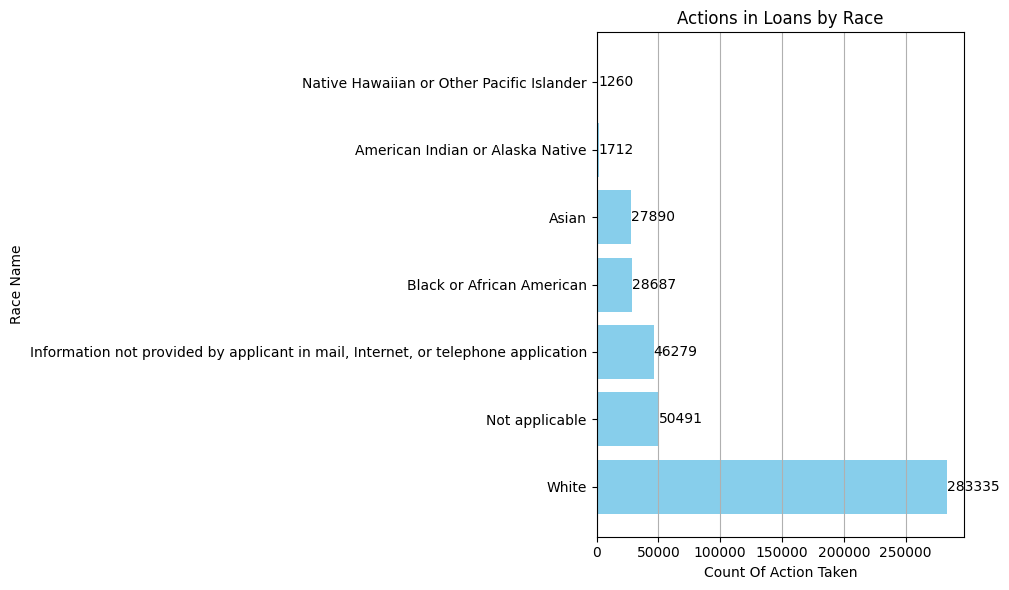

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the mortgage data
homeMortgage = mortgage_data

# Group by action and race, calculate counts, sort
homeMortgageStatus_applicant_race1 = (
    homeMortgage.groupby(["action_taken_name", "applicant_race_name_1"])
    .size()
    .reset_index(name="CountOfActionTaken")
    .sort_values(by="CountOfActionTaken", ascending=False)
)

# Group by race only, calculate total counts, sort
homeMortgage_applicant_race1 = (
    homeMortgage.groupby("applicant_race_name_1")
    .size()
    .reset_index(name="CountOfRace1")
    .sort_values(by="CountOfRace1", ascending=False)
)

# Plotting
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Bar plot with sorted races on y-axis, counts on x-axis
plt.barh(
    homeMortgage_applicant_race1["applicant_race_name_1"],
    homeMortgage_applicant_race1["CountOfRace1"],
    color="skyblue",  # Example color
)

# Add count labels to the bars
for i, v in enumerate(homeMortgage_applicant_race1["CountOfRace1"]):
    plt.text(v + 1, i, str(v), color="black", va="center")

# Customize the plot
plt.xlabel("Count Of Action Taken")
plt.ylabel("Race Name")
plt.title("Actions in Loans by Race")
plt.grid(axis="x")  # Add gridlines only to the x-axis
plt.tight_layout()  # Adjust layout for better readability

plt.show()

## Loan Status vs Race

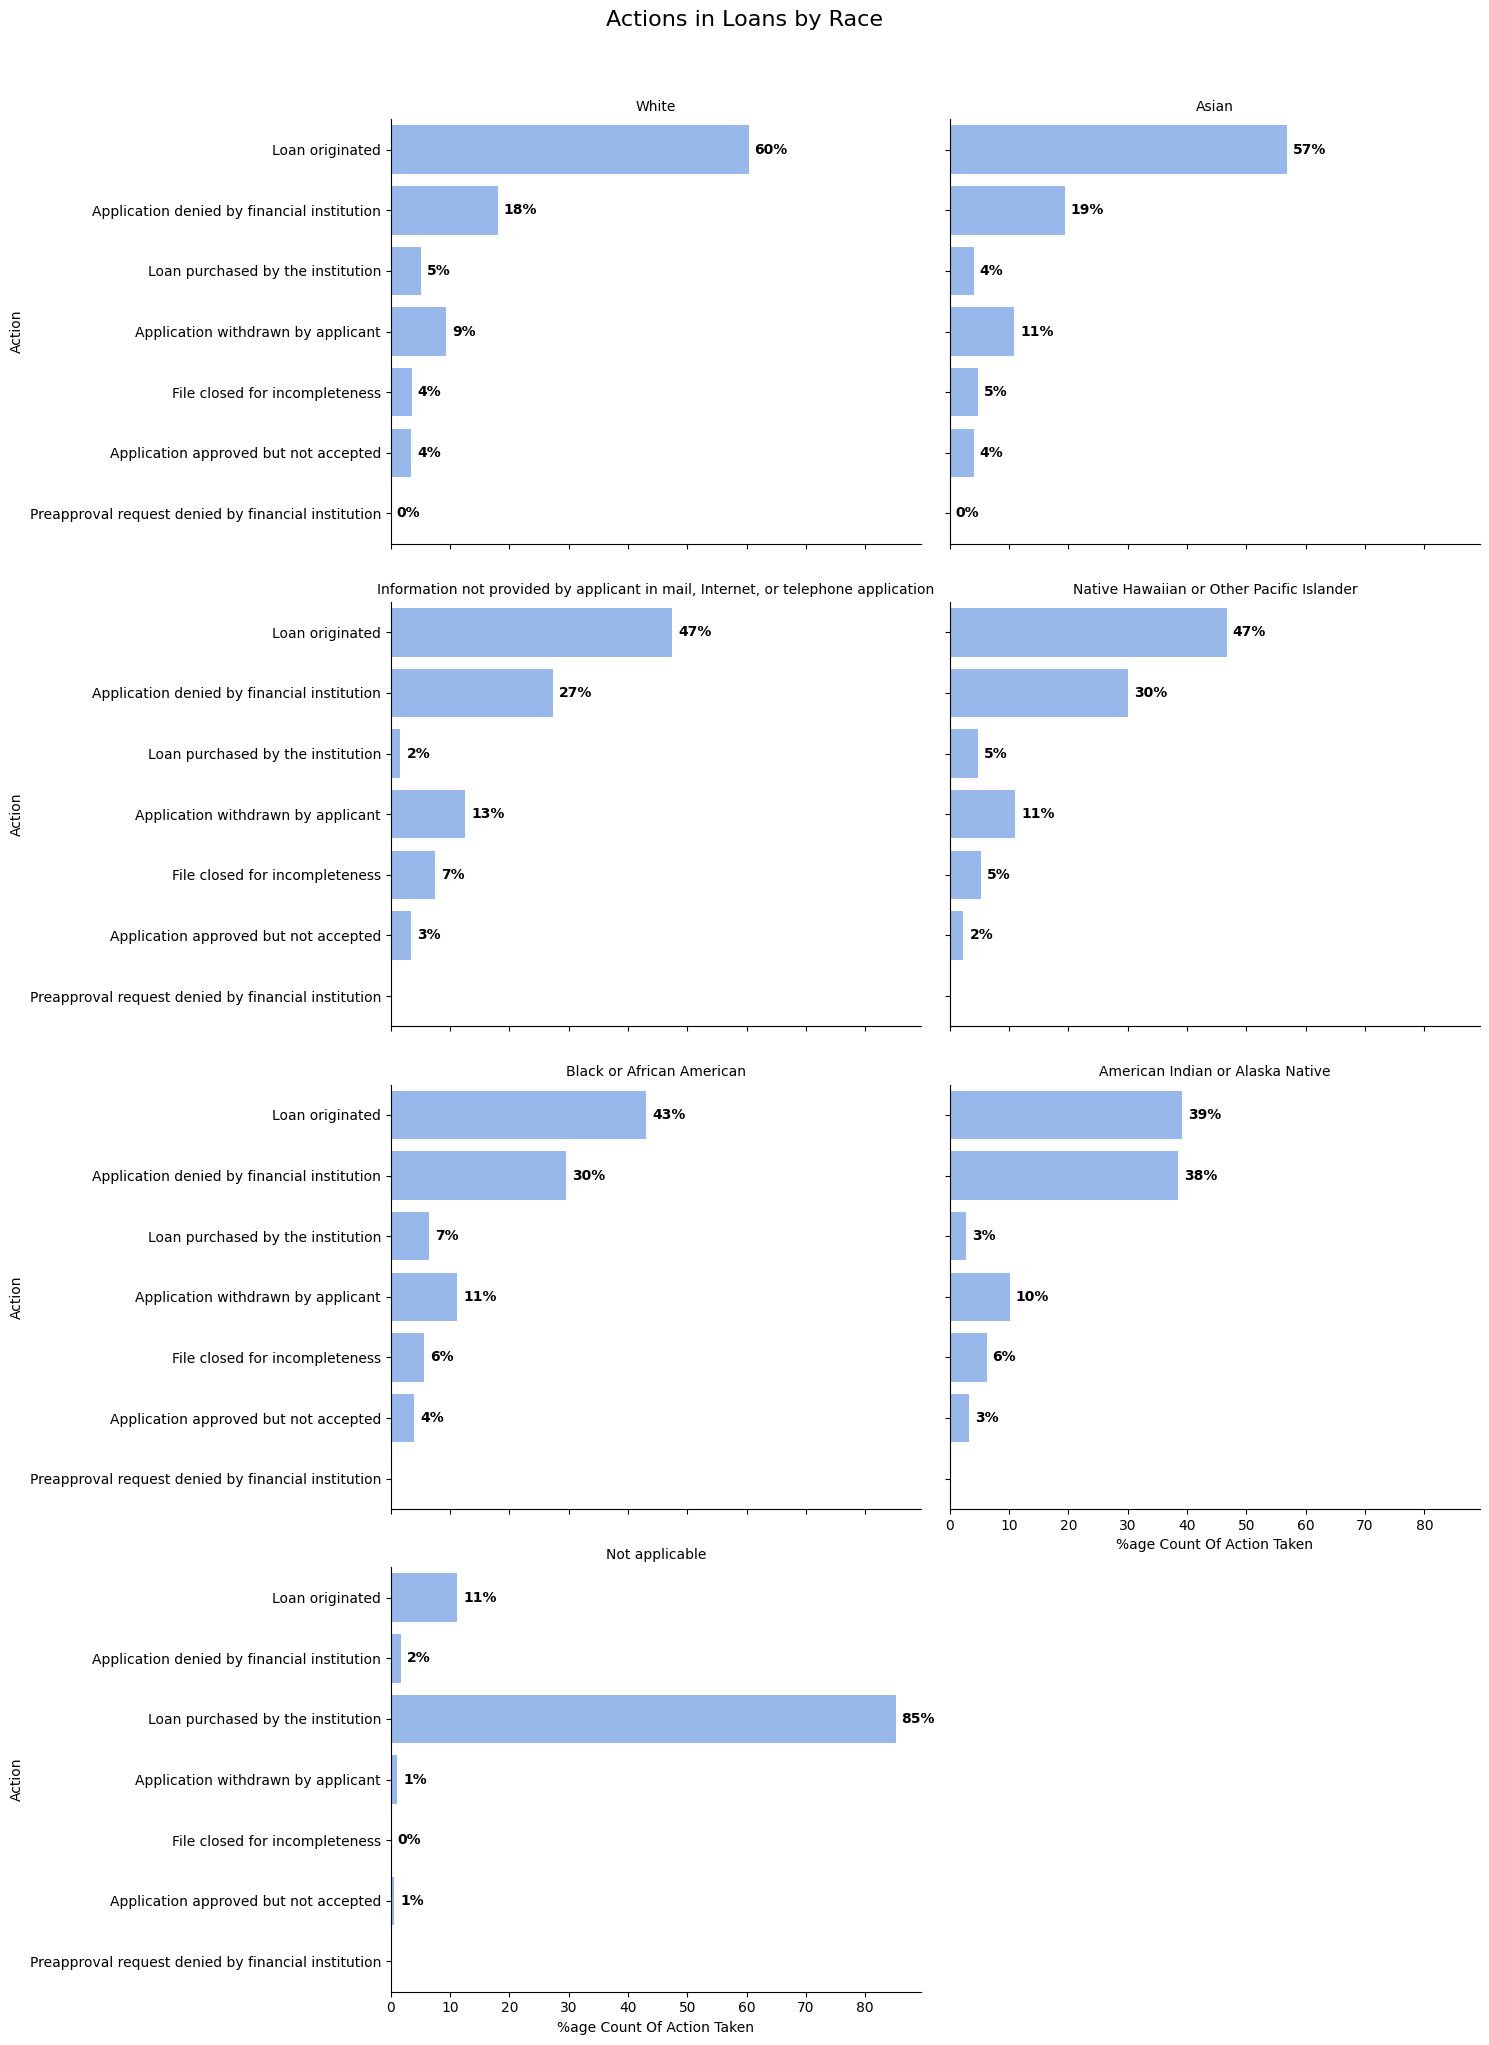

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (using the common function)
homeMortgage = mortgage_data

# 1. Analyze action taken by applicant's primary race
homeMortgageStatus_applicant_race1 = (homeMortgage.groupby(['action_taken_name', 'applicant_race_name_1'])
                                                  .size()
                                                  .reset_index(name='CountOfActionTaken')
                                                  .sort_values(by='CountOfActionTaken', ascending=False))

# 2. Analyze overall distribution of applicant's primary races
homeMortgage_applicant_race1 = (homeMortgage.groupby('applicant_race_name_1')
                                .size()
                                .reset_index(name='CountOfRace1')
                                .sort_values(by='CountOfRace1', ascending=False))

# 1. Join and calculate percentages (add to existing script)
homeMortgageStatus_race = (pd.merge(homeMortgageStatus_applicant_race1, homeMortgage_applicant_race1, on='applicant_race_name_1')
                           .assign(percentage=lambda df: (df['CountOfActionTaken'] / df['CountOfRace1']) * 100))

# 2. Sort for consistent facet order
top_action = homeMortgageStatus_race['action_taken_name'].value_counts(
).index[0]
facet_order = (homeMortgageStatus_race[homeMortgageStatus_race['action_taken_name'] == top_action]
               .sort_values('percentage', ascending=False)['applicant_race_name_1'].tolist())

# 3. Plot with FacetGrid, two graphs per row, and spacing
num_races = len(facet_order)
num_cols = 2  # Two graphs per row
num_rows = (num_races + num_cols - 1) // num_cols

g = sns.FacetGrid(homeMortgageStatus_race, col='applicant_race_name_1', col_wrap=num_cols,
                  sharey=True, height=5, aspect=1.5, col_order=facet_order)

g.map(sns.barplot, 'percentage', 'action_taken_name',
      order=homeMortgageStatus_race['action_taken_name'].unique(), color=fillColor)

# Add percentage labels
for ax in g.axes.flat:
    for p in ax.patches:
        width = p.get_width()
        if width > 0:
            ax.text(width + 1, p.get_y() + p.get_height() / 2, f"{width:.0f}%",
                    color='black', ha='left', va='center', fontweight='bold')

# Adjust layout for spacing
# Adjust vertical space between rows (0.8 is a good starting point, experiment as needed)
g.fig.subplots_adjust(hspace=0.8)

# Main title and labels
# This line replaces the default title template
g.set_titles(col_template="{col_name}")

g.fig.suptitle('Actions in Loans by Race', y=1.02, fontsize=16)
g.set_axis_labels("%age Count Of Action Taken",
                  "Action")  # Shared y-axis label

# Show the plot
plt.tight_layout()
plt.show()

# Applicant vs Income Distribution

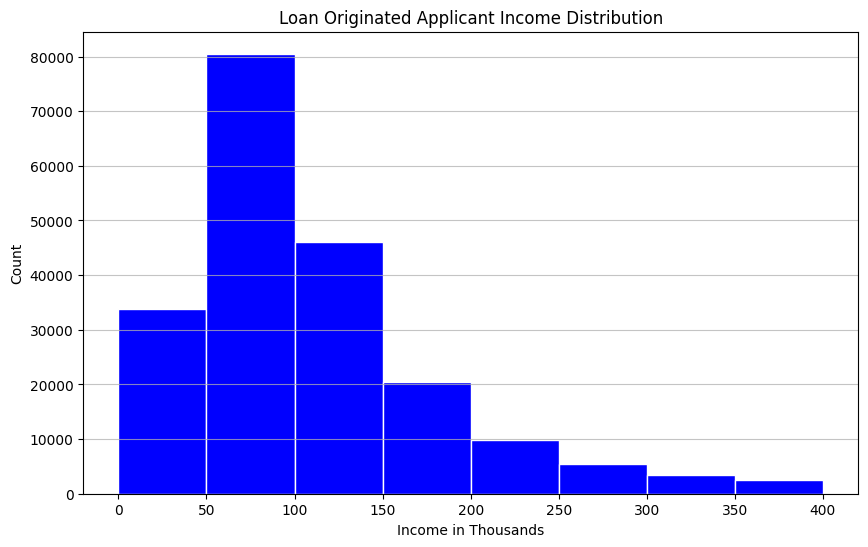

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data (using the common function)
homeMortgage = mortgage_data

# Filter for loan originations
actionStatus = "Loan originated"
originated_loans = homeMortgage[homeMortgage['action_taken_name']
                                == actionStatus]

# Set breaks for x-axis
breaks = list(range(0, 401, 50))  # Range from 0 to 400 with increments of 50

# Plot histogram
plt.figure(figsize=(10, 6))  # Optional: Adjust plot size
plt.hist(originated_loans['applicant_income_000s'],
         bins=breaks, color='blue', edgecolor='white')

# Add labels and title
plt.xlabel('Income in Thousands')
plt.ylabel('Count')
plt.title('Loan Originated Applicant Income Distribution')
plt.xticks(breaks)  # Set x-ticks to match the breaks

# Optional: Customize the grid
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

# Loan Purpose Types

The analysis proceeds with an investigation into the various loan purpose types associated with the loans in the dataset.

# Distribution of Loan Purpose Types

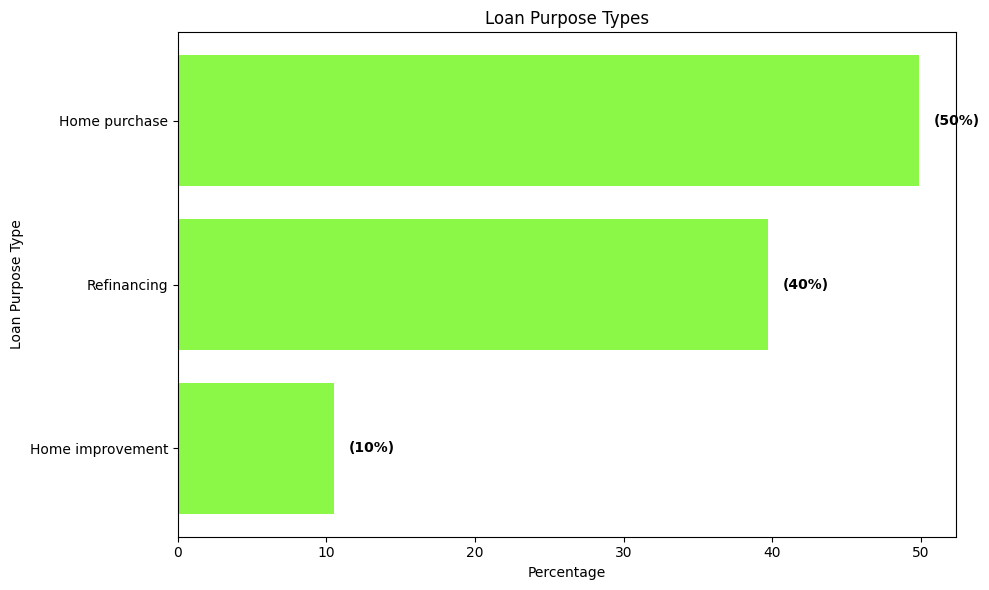

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data (using the common function)
homeMortgage = mortgage_data

# 1. Filter and aggregate data
loan_purpose_counts = (homeMortgage.dropna(subset=['loan_purpose_name'])  # Remove rows with missing loan purpose
                       .groupby('loan_purpose_name')
                       .size()
                       .reset_index(name='CountLoanPurpose')
                       .assign(percentage=lambda df: (df['CountLoanPurpose'] / df['CountLoanPurpose'].sum()) * 100)
                       .sort_values(by='percentage', ascending=True))  # Sort for plot

# 2. Create horizontal bar plot with percentage labels
plt.figure(figsize=(10, 6))  # Optional: Adjust plot size

plt.barh(loan_purpose_counts['loan_purpose_name'],
         loan_purpose_counts['percentage'], color=fillColor2)

# Add percentage labels
for i, v in enumerate(loan_purpose_counts['percentage']):
    plt.text(v + 1, i, f"({v:.0f}%)", color='black',
             va='center', fontweight='bold')

# Add plot labels and title
plt.xlabel('Percentage')
plt.ylabel('Loan Purpose Type')
plt.title('Loan Purpose Types')

# Show the plot
plt.tight_layout()
plt.show()

## Loan purpose types vs actions

The following bar graph presents a visual representation of the relationship between loan purpose types and the corresponding loan actions.

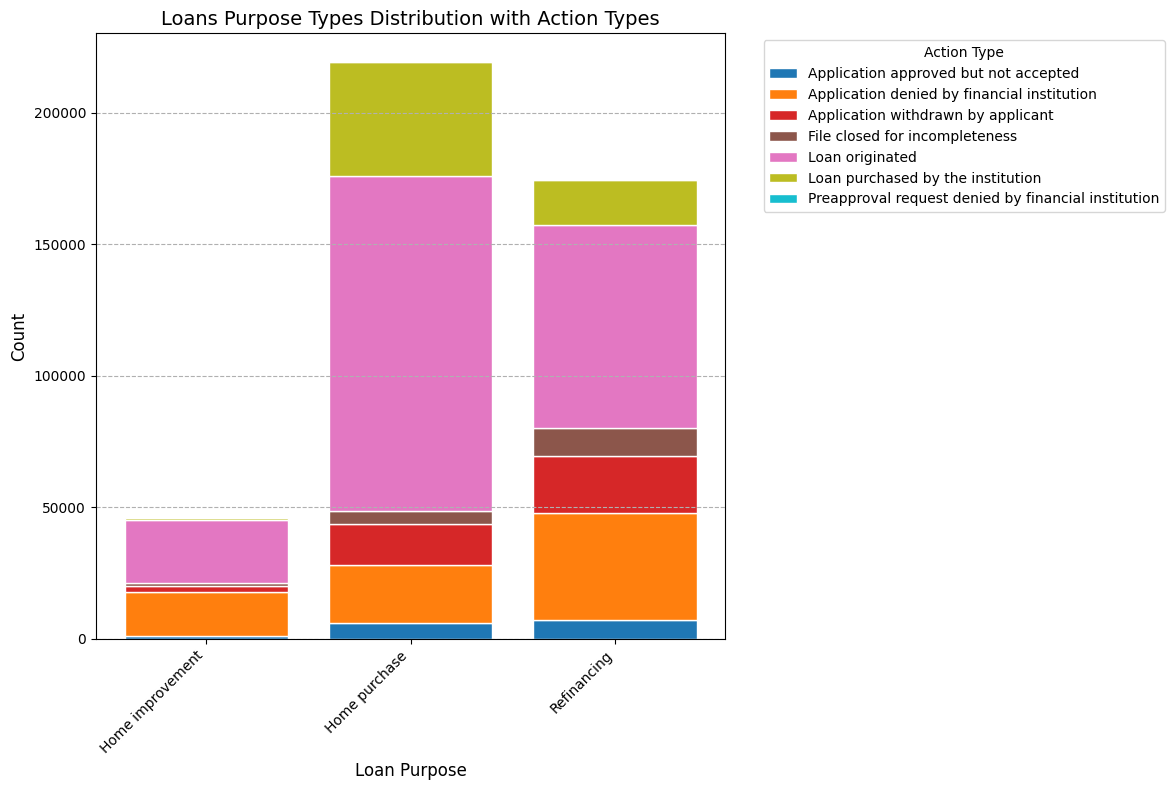

In [62]:
import pandas as pd
import numpy as np

# Load data (using the common function)
homeMortgage = mortgage_data

# Filter out rows with missing values in 'loan_purpose_name'
filtered_df = homeMortgage.dropna(subset=['loan_purpose_name'])

# Group by 'loan_purpose_name' and 'action_taken_name', then count
grouped_df = filtered_df.groupby(
    ['loan_purpose_name', 'action_taken_name']).size().unstack().fillna(0)

# Define a color palette
# Colors for each action type
colors = plt.cm.tab10(np.linspace(0, 1, len(grouped_df.columns)))

# Create the bar plot with a separate bar for each action type within each loan purpose
plt.figure(figsize=(12, 8))
bottom = np.zeros(len(grouped_df))  # Start each bar from 0

for i, action in enumerate(grouped_df.columns):
    plt.bar(grouped_df.index, grouped_df[action], bottom=bottom,
            label=action, color=colors[i], edgecolor='white')
    bottom += grouped_df[action]  # Stack the next bar on top

# Add labels, title, and customize the theme
plt.xlabel('Loan Purpose', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Loans Purpose Types Distribution with Action Types', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Add legend
plt.legend(title='Action Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

# Modeling

## CART - Prep the data

In [63]:
import pandas as pd

homeMortgage = mortgage_data

# Define the columns to be selected
selectedCols = ["action_taken", "applicant_ethnicity","applicant_sex",
                "applicant_income_000s", "applicant_race_1", "co_applicant_ethnicity",
                "co_applicant_sex", "county_code", "hoepa_status", "lien_status",
                "loan_purpose", "loan_type", "msamd",
                "owner_occupancy", "preapproval",
                "property_type", "purchaser_type", "loan_amount_000s"]

# Select specified columns from the original dataset
# Explicitly create a copy
homeMortgage_selectedCols = homeMortgage[selectedCols].copy()

# Create a new column 'isLoanOriginated' and initialize it to False
# Use .loc for assignment
homeMortgage_selectedCols.loc[:, 'isLoanOriginated'] = False

# Update 'isLoanOriginated' to True where 'action_taken' is 1
homeMortgage_selectedCols.loc[homeMortgage_selectedCols['action_taken']
                              == 1, 'isLoanOriginated'] = True

# Remove the 'action_taken' column
homeMortgage_selectedCols = homeMortgage_selectedCols.drop(
    'action_taken', axis=1)

# Convert columns to factors (using astype for simplicity)
for col in ['applicant_ethnicity', 'applicant_race_1', 'co_applicant_ethnicity', 'co_applicant_sex',
            'county_code', 'hoepa_status', 'lien_status', 'loan_purpose', 'loan_type', 'owner_occupancy',
            'preapproval', 'property_type', 'purchaser_type']:
    homeMortgage_selectedCols[col] = homeMortgage_selectedCols[col].astype(
        'category')


In [64]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# # Set random seed for reproducibility
# random_state = 3000

# # Split data into training and testing sets
# Train, Test = train_test_split(homeMortgage_selectedCols, test_size=0.7,
#                                random_state=random_state, stratify=homeMortgage_selectedCols['isLoanOriginated'])

# # Features (all columns except the target variable)
# X_train = Train.drop('isLoanOriginated', axis=1)
# y_train = Train['isLoanOriginated']

# # Build the CART model (Decision Tree Classifier) with rpart-like settings
# homeMortgageTree = DecisionTreeClassifier(
#     criterion='gini',         # Use Gini impurity (default for rpart)
#     splitter='best',           # Find the best split at each node
#     max_depth=None,           # Allow the tree to grow to its full depth
#     # Minimum number of samples required to split a node (default for rpart)
#     min_samples_split=2,
#     min_samples_leaf=5,       # Minimum number of samples required at each leaf node
#     # Minimum weighted fraction of the sum total of weights required at a leaf node (default for rpart)
#     min_weight_fraction_leaf=0.0,
#     max_features=None,        # Consider all features for splitting
#     random_state=random_state,
#     ccp_alpha=0.0             # Complexity parameter (0.0 to disable pruning)
# )

# homeMortgageTree.fit(X_train, y_train)

# # Visualize the tree
# plt.figure(figsize=(20, 10))
# plot_tree(homeMortgageTree, feature_names=X_train.columns,
#           class_names=['Not Originated', 'Originated'], filled=True)
# plt.show()

## XGBOOST - visualize the data

Accuracy: 81.09%


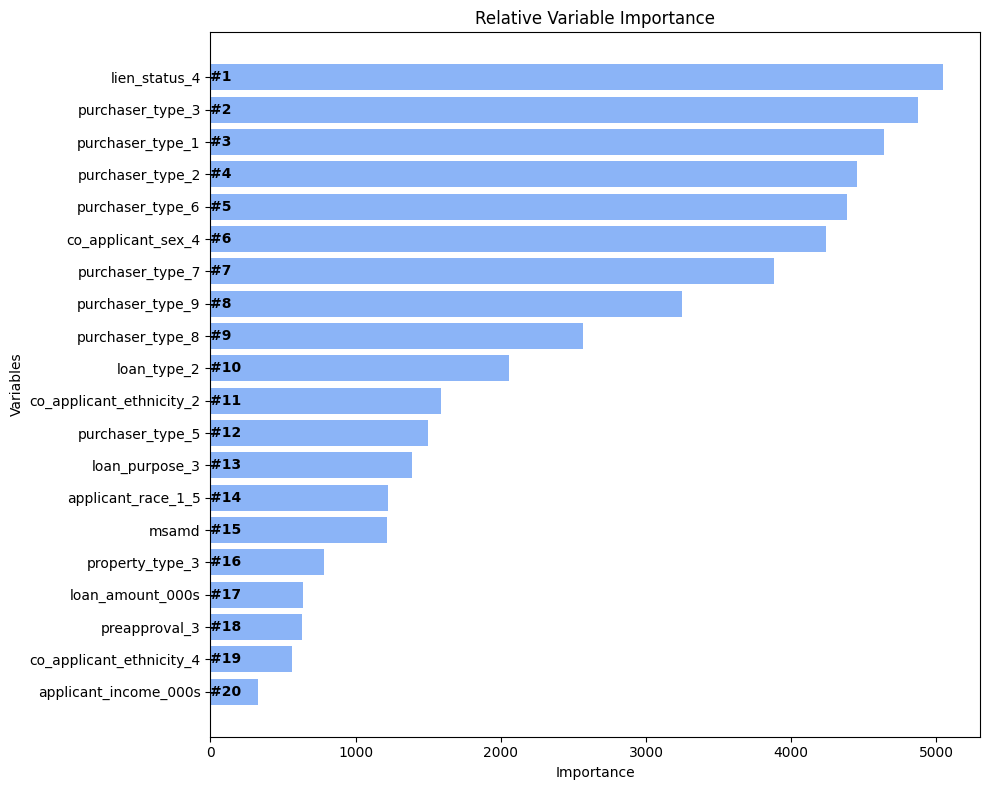

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Helper function to wrap XGBoost's prediction method
def xgboost_predict(data):
    data_dmatrix = xgb.DMatrix(data)
    return model.predict(data_dmatrix)


# 1. Convert categorical columns to dummy variables (one-hot encoding)
homeMortgage_selectedCols2 = pd.get_dummies(
    homeMortgage_selectedCols, drop_first=True)

# Check if the column exists before attempting to drop it
if 'isLoanOriginated_False' in homeMortgage_selectedCols2.columns:
    homeMortgage_selectedCols2 = homeMortgage_selectedCols2.drop(
        columns=['isLoanOriginated_False'])


# 2. Convert boolean target variable to integer labels
homeMortgage_selectedCols2['isLoanOriginated'] = homeMortgage_selectedCols2['isLoanOriginated'].astype(
    int)

# 3. Splitting Data into Training and Test Sets
X = homeMortgage_selectedCols2.drop("isLoanOriginated", axis=1)
y = homeMortgage_selectedCols2["isLoanOriginated"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=13)

# 4. Prepare Data for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 5. Define XGBoost Parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.05,
    'max_depth': 3,
    'gamma': 0,
    'colsample_bytree': 0.8,
    'min_child_weight': 1,
    'subsample': 1,
    'seed': 13
}

# 6. Train XGBoost Model
model = xgb.train(params, dtrain, num_boost_round=100)

# 7. Make Predictions and Evaluate
y_pred = model.predict(dtest)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# 8. Get Feature Importance and Rank
importance = model.get_score(importance_type='gain')
importance_df = pd.DataFrame(list(importance.items()), columns=[
                             'Variables', 'Importance'])

# Sort by importance in descending order and assign rank
importance_df = importance_df.sort_values(
    by='Importance', ascending=False).reset_index(drop=True)
importance_df['Rank'] = importance_df.index + \
    1  # Add 1 to get ranks starting from 1

# Select top 20 features
top_20_features = importance_df.head(20)  # Use head(20) to get the top 20

# 9. Plot Feature Importance with correct rankings
plt.figure(figsize=(10, 8))
plt.barh(top_20_features['Variables'],
         top_20_features['Importance'], color=fillColor)

# Add rank labels to the bars, properly aligned
for i, row in top_20_features.iterrows():
    plt.text(0, i, f"#{int(row['Rank'])}",
             color='black', ha='left', va='center', fontweight='bold')

# Add plot labels and title
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.title('Relative Variable Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Evaluate Fairness Metrics (Demographic Parity Difference and Equal Opportunity Difference)

In [66]:
# Evaluate fairness for protected attributes
import fairlearn.metrics as flm

# Assuming these are the protected attributes
protected_attrs = ['applicant_race_1_5',
                   'co_applicant_ethnicity_2',
                   'co_applicant_sex_4']
for attr in protected_attrs:
    # Demographic Parity Difference
    dpd = flm.demographic_parity_difference(y_true=y_test,
                                            y_pred=predictions,
                                            sensitive_features=X_test[attr])

    # Equal Opportunity Difference
    eod = flm.equalized_odds_difference(y_true=y_test,
                                        y_pred=predictions,
                                        sensitive_features=X_test[attr])

    print(f"\nFairness Metrics for {attr}:")
    print(f"  - Demographic Parity Difference: {dpd:.4f}")
    print(f"  - Equalized Odds Difference: {eod:.4f}")


Fairness Metrics for applicant_race_1_5:
  - Demographic Parity Difference: 0.2162
  - Equalized Odds Difference: 0.1047

Fairness Metrics for co_applicant_ethnicity_2:
  - Demographic Parity Difference: 0.1789
  - Equalized Odds Difference: 0.1024

Fairness Metrics for co_applicant_sex_4:
  - Demographic Parity Difference: 0.4384
  - Equalized Odds Difference: 0.2281


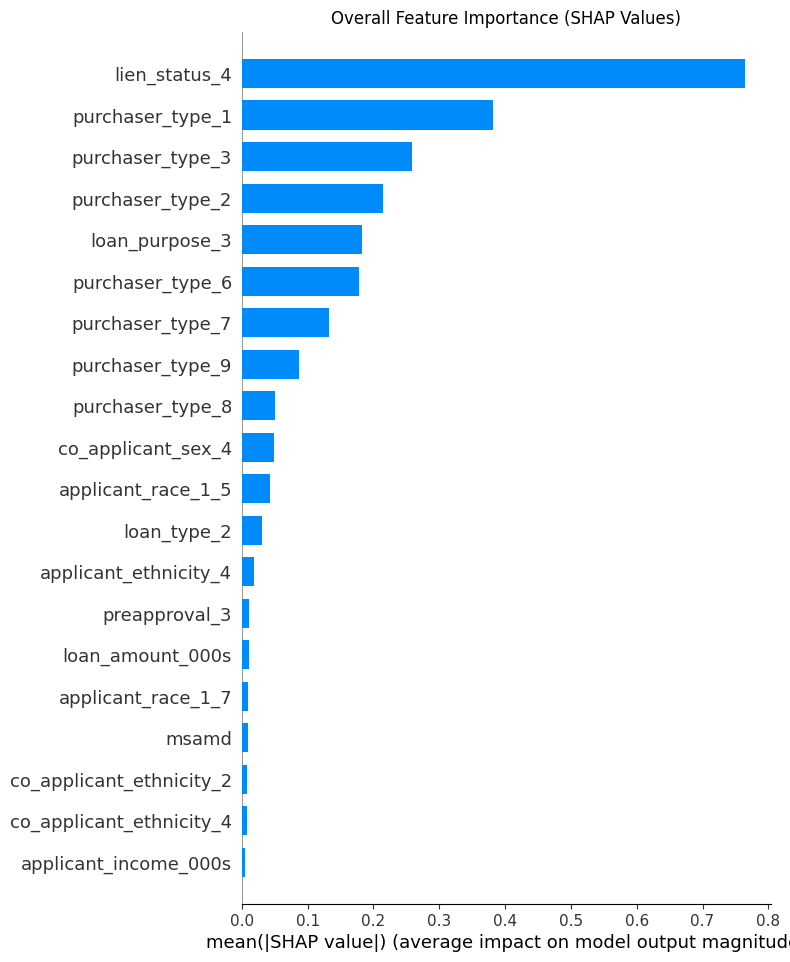

In [67]:
import shap

# 10. SHAP Values for Feature Importance and Interaction
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Visualize overall feature importance
plt.figure()
shap.summary_plot(shap_values, X_train, plot_type="bar",
                  show=False)  # Bar plot for feature importance
plt.title("Overall Feature Importance (SHAP Values)")
plt.show()

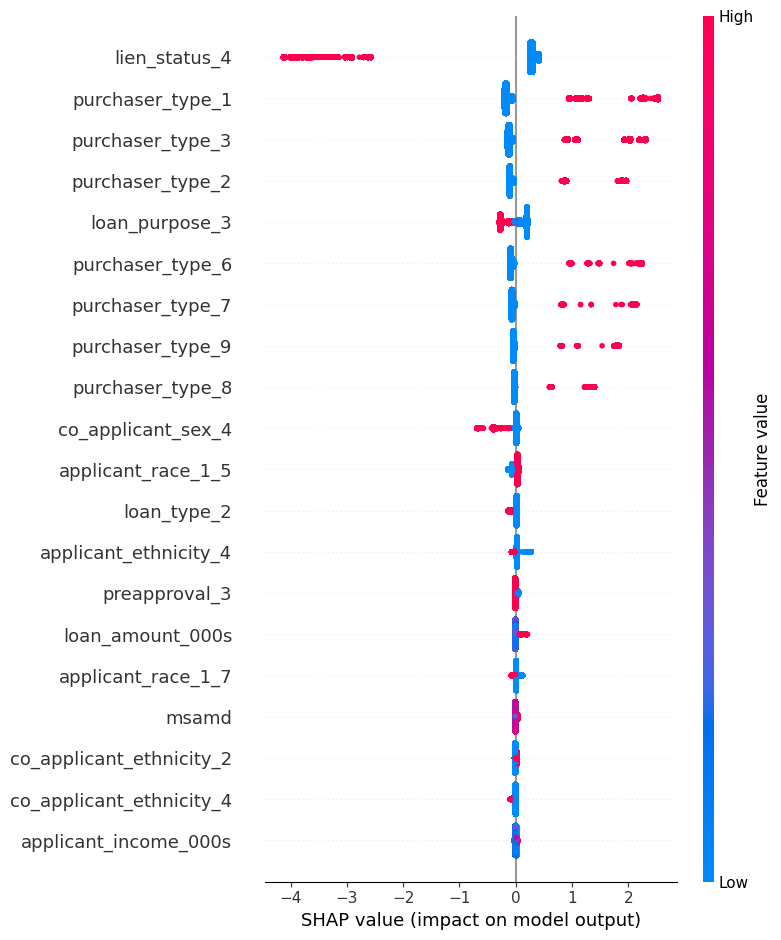

In [68]:
# Visualize feature importance for each prediction
shap.summary_plot(shap_values, X_train)

# # Explore feature interactions
# shap_interaction_values = explainer.shap_interaction_values(X_train)
# shap.summary_plot(shap_interaction_values, X_train)

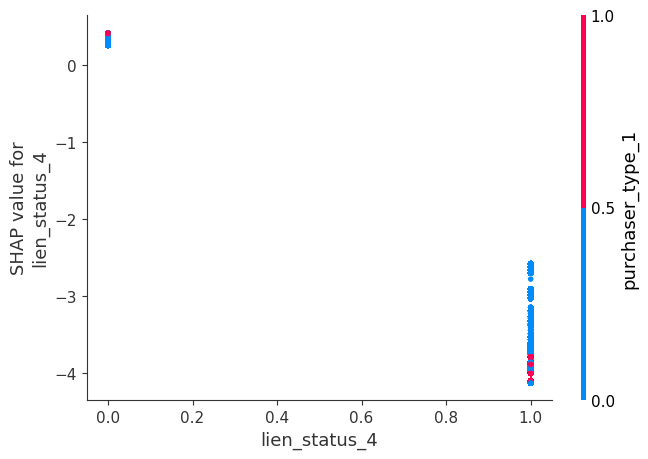

In [69]:
# Dependence plot for a specific feature
shap.dependence_plot('lien_status_4', shap_values, X_train)

In [70]:
# Force plot for a single prediction (e.g., the first instance)
shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_values[0, :], X_train.iloc[0, :])